<a href="https://colab.research.google.com/github/Yujia123/Collected-Resources/blob/master/Effectively_Using_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter  

# FuncFormatter: apply a user defined function to a value and return a nicely 
# formatted string to place on the axis.

In [66]:
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


The data consists of sales transactions for 2014. In order to make this post a little shorter, I'm going to summarize the data so we can see the total number of purchases and total sales for the top 10 customers. I am also going to rename columns for clarity during plots.

In [68]:
top_10 = (df.groupby('name')['ext price', 'quantity'].
          agg({'ext price': 'sum', 'quantity': 'sum'}).
          sort_values(by='ext price', ascending=False))[:10].reset_index()
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)
top_10

,Name,Sales,Purchases
0,Kulas Inc,137351.96,2265
1,White-Trantow,135841.99,2258
2,Trantow-Barrows,123381.38,2271
3,Jerde-Hilpert,112591.43,1999
4,"Fritsch, Russel and Anderson",112214.71,2112
5,Barton LLC,109438.50,2041
6,Will LLC,104437.60,1828
7,Koepp Ltd,103660.54,1790
8,"Frami, Hills and Schmidt",103569.59,1903
9,Keeling LLC,100934.30,1806


As I mentioned earlier, matplotlib has many different styles available for rendering plots. You can see which ones are available on your system using **plt.style.available** .

In [9]:
plt.style.available

['seaborn-colorblind',
 'seaborn-deep',
 'seaborn-paper',
 'seaborn-notebook',
 'seaborn-poster',
 'fivethirtyeight',
 'grayscale',
 'seaborn',
 'seaborn-ticks',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-pastel',
 'ggplot',
 'seaborn-darkgrid',
 'classic',
 'fast',
 'seaborn-bright',
 '_classic_test',
 'Solarize_Light2',
 'dark_background',
 'seaborn-white',
 'tableau-colorblind10',
 'seaborn-muted',
 'seaborn-talk',
 'bmh',
 'seaborn-whitegrid']

In [0]:
plt.style.use('ggplot')

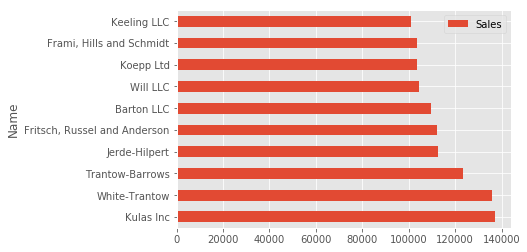

In [28]:
top_10.plot(kind='barh', y='Sales', x='Name');   # 'barh' - horizontal bar plot 

The reason I recommend using pandas plotting first is that it is a quick and easy way to prototype your visualization. Since most people are probably already doing some level of data manipulation/analysis in pandas as a first step, go ahead and use the basic plots to get started.

### Customizing the Plot

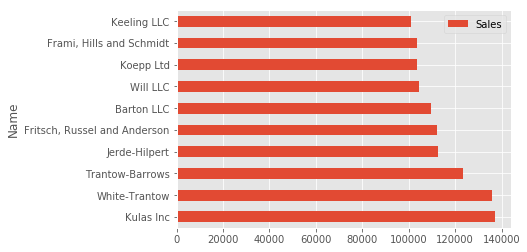

In [31]:
|fig, ax = plt.subplots()
top_10.plot(kind='barh', y='Sales', x='Name', ax=ax);

[plt.subplots()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html)

Text(0, 0.5, 'Customer')

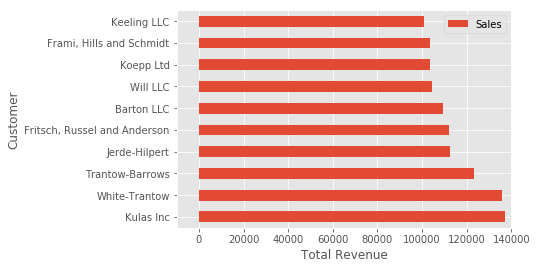

In [29]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y='Sales', x='Name', ax=ax)
ax.set_xlim([-10000, 140000])
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer');

<font color=red> 绘图时后面加上分号不显示<matplotlib.axes._subplots.AxesSubplot at 0x7fc1f8502828> 相关信息 <font>

Here’s another shortcut we can use to change the title and both labels:

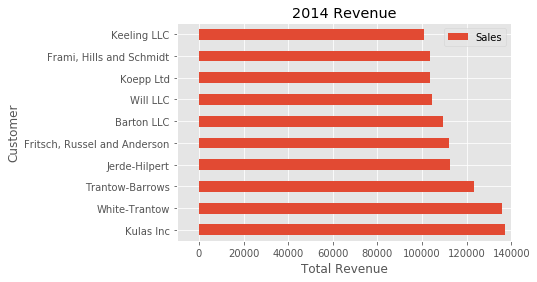

In [33]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y='Sales', x='Name', ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer');

To further demonstrate this approach, we can also adjust the size of this image. By using the plt.subplots() function, we can define the figsize in inches. We can also remove the legend using ax.legend().set_visible(False)

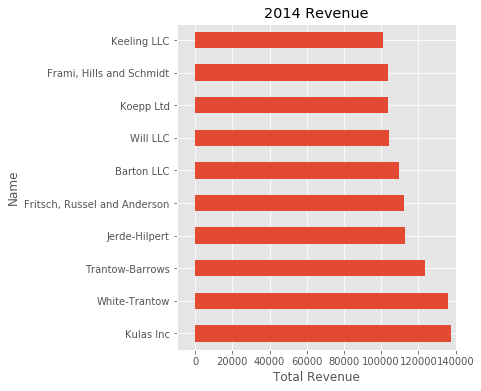

In [35]:
fig, ax = plt.subplots(figsize=(5, 6))
top_10.plot(kind='barh', y='Sales', x='Name', ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue')
ax.legend().set_visible(False)

There are plenty of things you probably want to do to clean up this plot. One of the biggest eye sores is the formatting of the Total Revenue numbers. Matplotlib can help us with this through the use of the FuncFormatter . This versatile function can apply a user defined function to a value and return a nicely formatted string to place on the axis.

Here is a currency formatting function to gracefully handle US dollars in the several hundred thousand dollar range:

In [0]:
def currency(x, pos):
  'The two args are the value and tick position'
  if x>= 1000000:
    return '${:1.1f}M'.format(x*1e-6)
  return '${:1.0f}K'.format(x*1e-3)

Now that we have a formatter function, we need to define it and apply it to the x axis. Here is the full code:

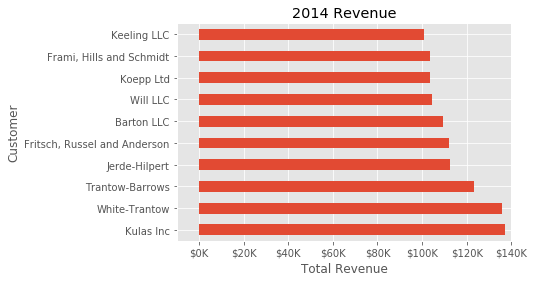

In [39]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y='Sales', x='Name', ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

The final customization feature I will go through is the ability to add annotations to the plot. In order to draw a vertical line, you can use ax.axvline() and to add custom text, you can use ax.text() .

For this example, we’ll draw a line showing an average and include labels showing three new customers. Here is the full code with comments to pull it all together.

In [0]:
# Create the figure and the axes
fig, ax = plt.subplots()

# Plot the data and get the averaged
top_10.plot(kind='barh', y='Sales', x='Name', ax=ax)
avg = top_10['Sales'].mean()

# Set limits and labels
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Annotate the new customers
for cust in [3, 5, 8]:
  ax.text(115000, cust, 'New Customer')
  
# Format the currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# Hide the legend
ax.legend().set_visible(False)

[matplotlib.pyplot.axvline](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvline.html)  
[matplotlib.axes.Axes.text](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.text.html)  


### Figures and Plots

Up until now, all the changes we have made have been with the indivudual plot. Fortunately, we also have the ability to add multiple plots on a figure as well as save the entire figure using various options.

If we decided that we wanted to put two plots on the same figure, we should have a basic understanding of how to do it. First, create the figure, then the axes, then plot it all together. We can accomplish this using plt.subplots() :

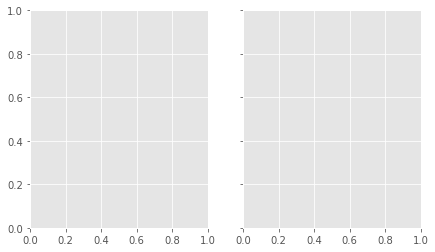

In [41]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4));

In this example, I’m using nrows and ncols to specify the size because this is very clear to the new user. In sample code you will frequently just see variables like 1,2. I think using the named parameters is a little easier to interpret later on when you’re looking at your code.

I am also using sharey=True so that the yaxis will share the same labels.

This example is also kind of nifty because the various axes get unpacked to ax0 and ax1 . Now that we have these axes, you can plot them like the examples above but put one plot on ax0 and the other on ax1 .

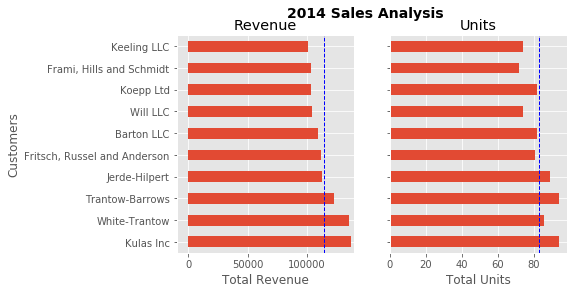

In [43]:
# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))
top_10.plot(kind='barh', y='Sales', x='Name', ax=ax0)
ax0.set_xlim([-10000, 140000])
ax0.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')

# Plot the average as a vertical line
avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Repeat for the unit plot
top_10.plot(kind='barh', y="Purchases", x="Name", ax=ax1)
avg = top_10['Purchases'].mean()
ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Title the figure
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold')

# Hide the legends
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

[matplotlib.axes.Axes.axvline](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.axvline.html)

Up until now, I have been relying on the jupyter notebook to display the figures by virtue of the %matplotlib inline directive. However, there are going to be plenty of times where you have the need to save a figure in a specific format and integrate it with some other presentation.

Matplotlib supports many different formats for saving files. You can use fig.canvas.get_supported_filetypes() to see what your system supports:

In [0]:
fig.canvas.get_supported_filetypes()

Since we have the fig object, we can save the figure using multiple options:

In [0]:
fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches='tight')

This version saves the plot as a png with opaque background. I have also specified the dpi and bbox_inches="tight" in order to minimize excess white space.

### Conclusion

As a final bonus, I am including a quick guide to unify all the concepts. I hope this helps bring this post together and proves a handy reference for future use.

![reference for matplotlib](https://pbpython.com/images/matplotlib-pbpython-example.png)